In [1]:
import pandas as pd
import os

trumpFile=os.path.join('data_TA4','trumps.csv')
allTweets=pd.read_csv(trumpFile)
allTweets

,created_at,text,is_retweet,favorite_count,retweet_count,Hour,Day,Date
0,2020-08-13 23:26:50,.@DonYoungAK really produces for Alaska. He is...,False,18714,5305,23,5,2020-08-13
1,2020-08-13 23:23:26,"...She will be a great Senator, and has my Com...",False,14946,3490,23,5,2020-08-13
2,2020-08-13 23:23:25,.@CynthiaMLummis is a friend of mine and a gre...,False,32586,8584,23,5,2020-08-13
3,2020-08-13 21:27:36,LIVE: President @realDonaldTrump holds a news ...,True,0,5917,21,5,2020-08-13
4,2020-08-13 18:59:29,https://t.co/ymvtIzQqoR,False,20131,5303,18,5,2020-08-13
...,...,...,...,...,...,...,...,...
194,2020-08-04 23:00:40,Reopening Our Schools: @realDonaldTrump says s...,True,0,7205,23,3,2020-08-04
195,2020-08-04 23:00:38,Reopening America: President @realDonaldTrump ...,True,0,7603,23,3,2020-08-04
196,2020-08-04 23:00:15,We have far and away the most robust testing c...,True,0,5717,23,3,2020-08-04
197,2020-08-04 22:48:35,"""As we shelter those at high risk, we are also...",True,0,5414,22,3,2020-08-04


In [2]:
DTtweets=allTweets[~allTweets.is_retweet]
DTtweets.reset_index(drop=True,inplace=True)

In [3]:
DTtweets

,created_at,text,is_retweet,favorite_count,retweet_count,Hour,Day,Date
0,2020-08-13 23:26:50,.@DonYoungAK really produces for Alaska. He is...,False,18714,5305,23,5,2020-08-13
1,2020-08-13 23:23:26,"...She will be a great Senator, and has my Com...",False,14946,3490,23,5,2020-08-13
2,2020-08-13 23:23:25,.@CynthiaMLummis is a friend of mine and a gre...,False,32586,8584,23,5,2020-08-13
3,2020-08-13 18:59:29,https://t.co/ymvtIzQqoR,False,20131,5303,18,5,2020-08-13
4,2020-08-13 18:59:28,https://t.co/BY6PrMRmqJ,False,22491,5979,18,5,2020-08-13
...,...,...,...,...,...,...,...,...
116,2020-08-05 10:14:17,For those that thought I wasn’t into the Envir...,False,76892,19899,10,4,2020-08-05
117,2020-08-05 10:09:00,A great race run by Roger against a very tough...,False,36164,9094,10,4,2020-08-05
118,2020-08-05 09:57:17,There is TREMENDOUS Lawlessness in America’s L...,False,106282,27765,9,4,2020-08-05
119,2020-08-04 23:38:31,https://t.co/JDS4zUXXJG,False,260172,59637,23,3,2020-08-04


# Tokenización

In [ ]:
!pip install nltk

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Carlos
[nltk_data]     Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
DTtweets['text'].apply(nltk.word_tokenize)

0      [., @, DonYoungAK, really, produces, for, Alas...
1      [..., She, will, be, a, great, Senator, ,, and...
2      [., @, CynthiaMLummis, is, a, friend, of, mine...
3                          [https, :, //t.co/ymvtIzQqoR]
4                          [https, :, //t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn, ’, t, int...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                        [https, :, //t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

In [8]:
DTtweets.text.str.split('\s')

0      [.@DonYoungAK, really, produces, for, Alaska.,...
1      [...She, will, be, a, great, Senator,, and, ha...
2      [.@CynthiaMLummis, is, a, friend, of, mine, an...
3                              [https://t.co/ymvtIzQqoR]
4                              [https://t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn’t, into, t...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                            [https://t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

In [9]:
import numpy as np

wordInSeries=pd.Series(np.concatenate(DTtweets.text.str.split('\s')))
wordInSeries

0                   .@DonYoungAK
1                         really
2                       produces
3                            for
4                        Alaska.
                  ...           
2915                        Stay
2916                    informed
2917                         at:
2918    https://t.co/p9j7kZsD7b.
2919     https://t.co/nnnUHCzOLV
Length: 2920, dtype: object

# Cleaning the tokens

In [10]:
wordInSeries=wordInSeries[~wordInSeries.str.startswith('http')].reset_index(drop=True)
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [11]:
wordInSeries=wordInSeries.str.replace('[^\x01-\x7F]','')
wordInSeries=wordInSeries.str.replace('&amp;','and')
wordInSeries=wordInSeries.str.replace('&lt;|&gt;','')
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [12]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
wordInSeries=wordInSeries.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
wordInSeries=wordInSeries.str.lower()
wordInSeries

0       donyoungak
1           really
2         produces
3              for
4           alaska
           ...    
2861          oval
2862        office
2863          stay
2864      informed
2865            at
Length: 2866, dtype: object

In [13]:
wordInSeries.value_counts()


the           136
and            91
to             79
in             67
of             58
             ... 
plague          1
cops            1
sleazebags      1
highest         1
informed        1
Name: count, Length: 1027, dtype: int64

# STOP WORDS

In [14]:
import nltk
from nltk.corpus import stopwords
import pandas as pd

# Descargar los recursos necesarios de NLTK
nltk.download('stopwords')

# Definir las stopwords en inglés
STOPS = set(stopwords.words('english'))

# Filtrar las stopwords y resetear el índice
wordInSeries = wordInSeries[~wordInSeries.isin(STOPS)].reset_index(drop=True)

# Mostrar el resultado
print(wordInSeries)


0       donyoungak
1           really
2         produces
3           alaska
4       incredible
           ...    
1681         force
1682          oval
1683        office
1684          stay
1685      informed
Length: 1686, dtype: object


[nltk_data] Downloading package stopwords to C:\Users\Carlos
[nltk_data]     Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
wordInSeries

0       donyoungak
1           really
2         produces
3           alaska
4       incredible
           ...    
1681         force
1682          oval
1683        office
1684          stay
1685      informed
Length: 1686, dtype: object

# Frecuencia de palabras

In [16]:
wordInSeries.value_counts()

great       27
bus         20
people      18
usdot       17
big         15
            ..
men          1
women        1
fighting     1
plague       1
informed     1
Name: count, Length: 927, dtype: int64

<Axes: ylabel='Frequency'>

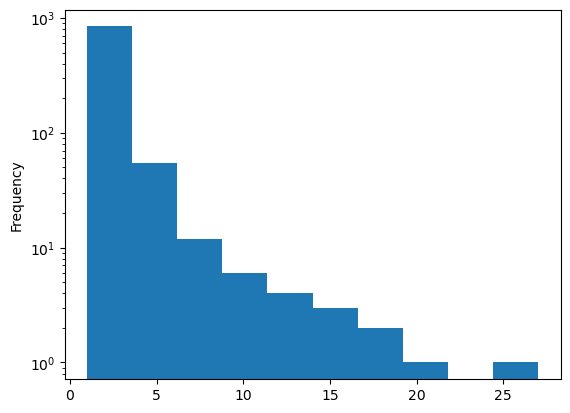

In [17]:
wordInSeries.value_counts().plot(logy=True, kind='hist')

FrequencyTrumpTokens=wordInSeries.value_counts()[wordInSeries.value_counts()>5]
FrequencyTrumpTokens

In [20]:
FrequencyTrumpTokens.to_dict()

{'great': 27,
 'bus': 20,
 'people': 18,
 'usdot': 17,
 'big': 15,
 'service': 14,
 'infrastructure': 14,
 'support': 13,
 'state': 12,
 'complete': 12,
 'news': 12,
 'federal': 11,
 'endorsement': 11,
 'total': 10,
 'funds': 10,
 'joe': 10,
 'congratulations': 9,
 '': 8,
 'biden': 8,
 'thank': 8,
 'improvements': 8,
 'happy': 7,
 'president': 7,
 'fake': 7,
 'good': 7,
 'new': 7,
 'states': 7,
 'second': 7,
 'first': 7,
 'way': 6,
 'vets': 6,
 'funding': 6,
 'would': 6,
 'amendment': 6,
 'one': 6,
 'win': 6,
 'strong': 6,
 'congressman': 6}

# Plot 

In [ ]:
!pip install wordcloud

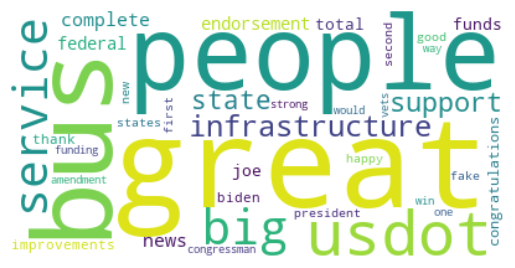

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud
 
wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()

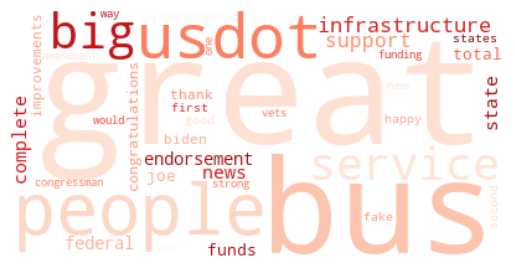

In [22]:
wc2 = WordCloud(background_color='white',
                colormap="Reds")
wc2.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bigrams

In [24]:
f = open("data_TA4/sometext.txt", "r")

textFile=os.path.join('data_TA4','sometext.txt')
allText=pd.read_table(textFile,header=None)

# see the text
allText

,0
0,Seattle is under siege. Over the past five yea...
1,"At the same time, according to the Puget Sound..."
2,"Over the past year, I’ve spent time at city co..."
3,Seattle has long been known as one of America’...
4,"On the surface, this argument has its own inte..."
5,"Even in a pricey city like Seattle, most worki..."
6,Using homelessness as a symbol of “capitalism’...
7,"What the socialists won’t, or can’t, see is th..."
8,The stubborn reality is that Seattle is expens...
9,"“What the socialists won’t, or can’t, see is t..."


In [25]:
allText[0]=allText[0].str.lower()
allText[0]=allText[0].str.replace('['+PUNCs+']', '',regex=True)

In [26]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

[('seattle', 'is'),
 ('is', 'under'),
 ('under', 'siege'),
 ('siege', 'over'),
 ('over', 'the'),
 ('the', 'past'),
 ('past', 'five'),
 ('five', 'years'),
 ('years', 'the'),
 ('the', 'emerald'),
 ('emerald', 'city'),
 ('city', 'has'),
 ('has', 'seen'),
 ('seen', 'an'),
 ('an', 'explosion'),
 ('explosion', 'of'),
 ('of', 'homelessness'),
 ('homelessness', 'crime'),
 ('crime', 'and'),
 ('and', 'addiction'),
 ('addiction', 'in'),
 ('in', 'its'),
 ('its', '2017'),
 ('2017', 'pointintime'),
 ('pointintime', 'count'),
 ('count', 'of'),
 ('of', 'the'),
 ('the', 'homeless'),
 ('homeless', 'king'),
 ('king', 'county'),
 ('county', 'socialservices'),
 ('socialservices', 'agency'),
 ('agency', 'all'),
 ('all', 'home'),
 ('home', 'found'),
 ('found', '11643'),
 ('11643', 'people'),
 ('people', 'sleeping'),
 ('sleeping', 'in'),
 ('in', 'tents'),
 ('tents', 'cars'),
 ('cars', 'and'),
 ('and', 'emergency'),
 ('emergency', 'shelters'),
 ('shelters', 'property'),
 ('property', 'crime'),
 ('crime', 'has'

In [27]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

[('past', 'five'), ('five', 'years'), ('emerald', 'city'), ('homelessness', 'crime'), ('2017', 'pointintime'), ('pointintime', 'count'), ('homeless', 'king'), ('king', 'county'), ('county', 'socialservices'), ('socialservices', 'agency'), ('home', 'found'), ('found', '11643'), ('11643', 'people'), ('people', 'sleeping'), ('tents', 'cars'), ('emergency', 'shelters'), ('shelters', 'property'), ('property', 'crime'), ('rate', 'two'), ('half', 'times'), ('times', 'higher'), ('los', 'angeles’s'), ('four', 'times'), ('times', 'higher'), ('new', 'york'), ('york', 'city’s'), ('city’s', 'cleanup'), ('cleanup', 'crews'), ('crews', 'pick'), ('dirty', 'needles'), ('city', 'streets'), ('parks', 'every'), ('every', 'year'), ('time', 'according'), ('puget', 'sound'), ('sound', 'business'), ('business', 'journal'), ('seattle', 'metro'), ('metro', 'area'), ('area', 'spends'), ('1', 'billion'), ('billion', 'fighting'), ('fighting', 'homelessness'), ('homelessness', 'every'), ('every', 'year'), ('year', 

In [28]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

,theBigram,weight
0,"(king, county)",8
1,"(addiction, evangelists)",7
2,"(homelessindustrial, complex)",6
3,"(harm, reduction)",5
4,"(homeless, encampments)",4
...,...,...
1383,"(people, able)",1
1384,"(live, work)",1
1385,"(flourishing, environment)",1
1386,"(whether, political)",1


In [29]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

,theBigram,weight,word1,word2
0,"(king, county)",8,king,county
1,"(addiction, evangelists)",7,addiction,evangelists
2,"(homelessindustrial, complex)",6,homelessindustrial,complex
3,"(harm, reduction)",5,harm,reduction
4,"(homeless, encampments)",4,homeless,encampments
...,...,...,...,...
1383,"(people, able)",1,people,able
1384,"(live, work)",1,live,work
1385,"(flourishing, environment)",1,flourishing,environment
1386,"(whether, political)",1,whether,political


In [30]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

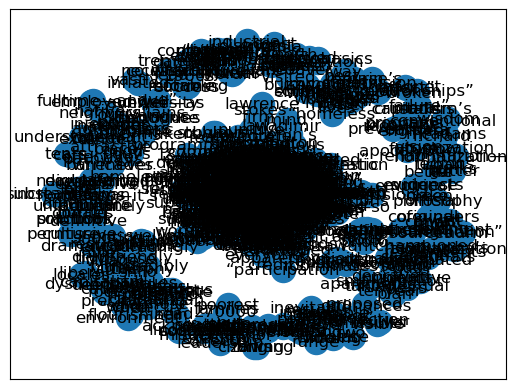

In [31]:
# plotting graph (default layout)
nx.draw_networkx(G_bigram)

In [32]:
#subsetting
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

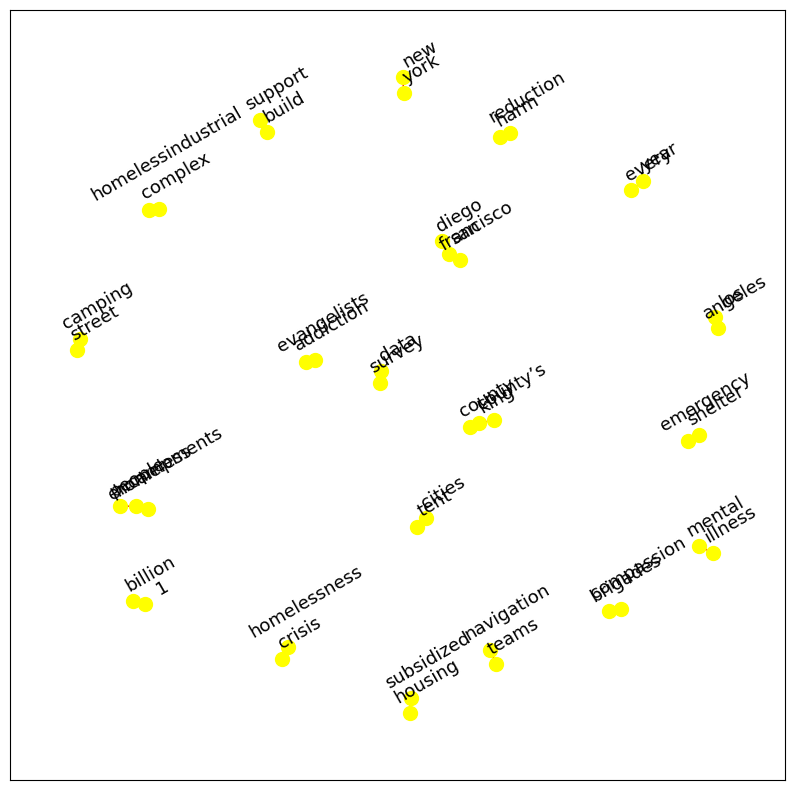

In [33]:
#plotting    
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)
    
plt.show()

C:\Users\Carlos Daniel\AppData\Local\Temp\ipykernel_19664\3843452.py:12: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])


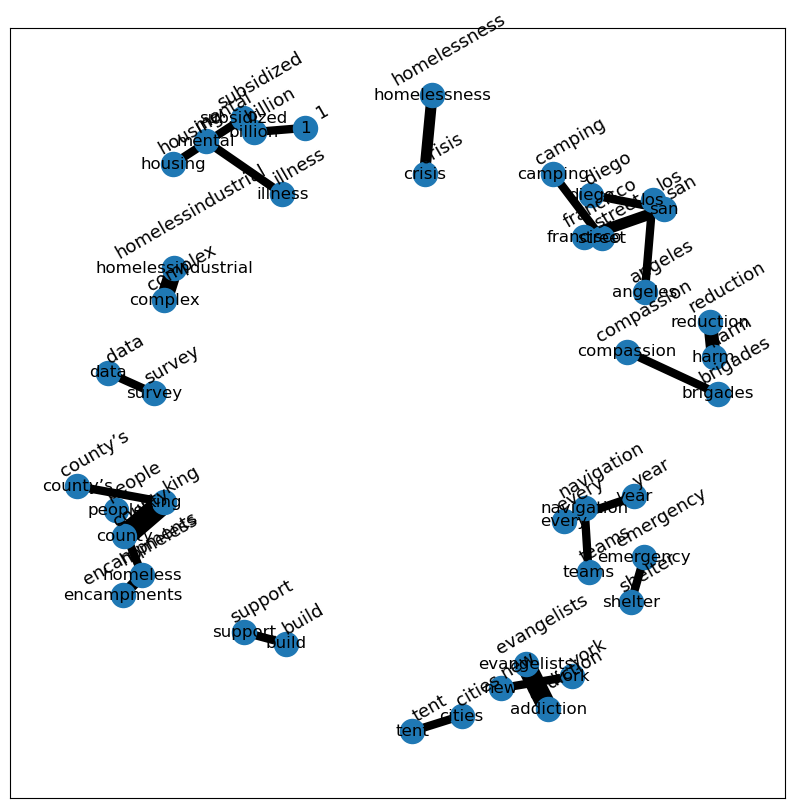

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center', 
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])

# Ahora sí, la tarea

## Ejercicio 2